### Sine curves continued...
Here we are going to make a few sine curves with different *amplitudes* *a* and *periods* *T*  
Amplitude is a measure of the peak values. Sines and cosines vary between -1 and 1...so the amplitude of a plain sine or cosine curve is 1  
We can change is by multiplying all of the values by some other amplitude *a*  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

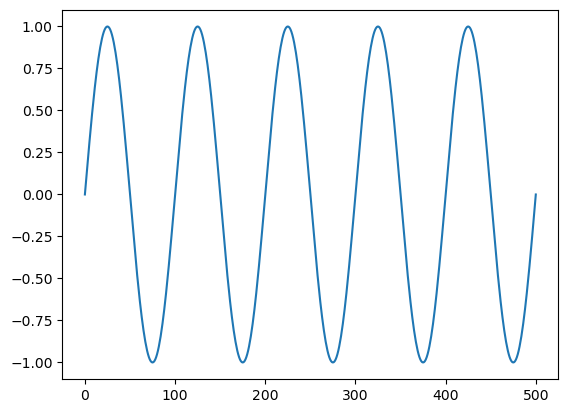

In [2]:
# Make the same curve as before:
T = 100   # period is 100 s
omega = 2. * np.pi / T  # go straight to angular frequency in radians...now we wil call it omega

total_time = 500
t = np.arange( 0., total_time+1 )
z = np.sin( t * omega )
plt.plot( t, z )

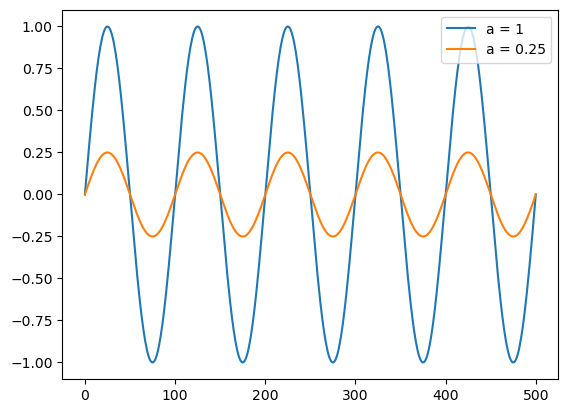

In [3]:
# now make a second curve with an amplitude of 0.25
a = 0.25
z2 = a * np.sin( t * omega )
plt.plot( t, z, label='a = 1' )
plt.plot( t, z2, label='a = 0.25' )
plt.legend()

### Note on the difference between amplitude ($a$) and wave height ($H$)
The wave height is measured from the trough to the crest, so for a sine curve, it is twice the amplitude  
$H = 2a$  
I am sneaking in the math symbols, using *italics* for the variables (e.g., $H$ and $a$) and simple font for the way we have to code it:  
H = 2 * a

### One more complication: *phase*
So far, we have assumed the angles start at zero, so sine( first time ) = 0.  
So, the peaks line up in the plot above, even though they have different values.  
We can change the phase by adding or subtracting from the time we use to calculate the sine curve.  
We will call phase $\phi$ (phi)  

Here is short table summarizing the variables and units  


| Symbol | Meaning | Units |
|:--------|:---------|:--------------|
| $T$ | Wave period | seconds |
| $f = 1/T$ | Frequency | hertz (Hz) |
| $\omega = 2\pi f$ (omega = 2 * pi * f)| Angular frequency | radians s⁻¹ |
| $a$ | Amplitude | meters |
| $\phi$ (phi)| Phase | radians |
| $t$ | Time | seconds |
| $z(t) = a \sin(\omega t + \phi)$ | Surface elevation | meters |



### Calculate and plot waves with various phases

<details>
<summary>Click for more info on the next bit of code</summary>  
      
First, note the markdown trick for hiding some notes...you can use this to remove distractions 
from the documentation, or to hide answers in excercises.  
  
There are a lot of new concepts in the cell below.  
  
line 10 makes a *list* called *phases* with four phases in it.
The square brackets [ ] group the items.  
  
line 13 sets up a plot with a print size of 8" wide by 4" tall.  
  
line 14 sets up a *for* loop.  This is a key concept in programming.  
The loop means "do the same thing for each value in the list *phases*, calling the current value *phi*    
  
Inside the loop, the value of *phi* changes with each value in *phases* and generates a new time series *z*.  
The new values of *z* replace the earlier values and then are plotted.  
   
The plot label each time is a "format" string, where the value of *phi* is displayed with 2 decimal places.
</details>

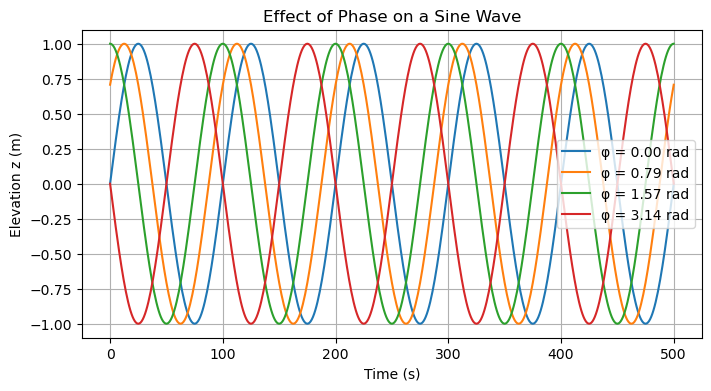

In [4]:
# Basic parameters
T = 100.0                   # period [s]
f = 1 / T                  # frequency [Hz]
omega = 2 * np.pi * f      # angular frequency [rad/s]
a = 1.0                    # amplitude [m]
total_time = 500
t = np.arange( 0., total_time+1 )  # time array [s]

# Phases are zero, 1/8 period, 1/4 period, and half a period (remember, a full period is 2 pi)
phases = [0, np.pi/4, np.pi/2, np.pi]   # radians

# Plot
plt.figure(figsize=(8,4))
for phi in phases:
    z = a * np.sin(omega * t + phi)
    plt.plot(t, z, label=f'φ = {phi:.2f} rad')

plt.xlabel('Time (s)')
plt.ylabel('Elevation z (m)')
plt.title('Effect of Phase on a Sine Wave')
plt.legend()
plt.grid(True)
plt.show()

### Now, lets add multiple sine waves to make make irregular shapes.  
Change the amplitudes, periods, and phases of these waves to make new patterns.  

<details>
<summary>Click for more info on the code</summary>  
    
   
New concepts:  

t is an *array* of numbers. We want to make an array just like t, but full of zeros:  
`zsum = np.zeros_like( t )`  
  
We want to make a stacked plot with four panels, so we use the `subplots` function.  
`fig, ax = plt.subplots(4, 1, sharex = True, figsize=(8,4))`  
The arguments `4, 1` say we want a set of four vertical and one horizontal panels.  
`sharex = True` says we want all four panels to share the same x-axis...this keeps the times lined up.  
In this case, `ax` is an array of four *axis* objects...we can plot on them using their index.  
`ax[0].plot( t, z )` will plot on the first axis.  

Here is a different way to set up a `for` loop:  
`for i, T in enumerate( periods ):` ... the `enumerate` command returns values from the list as before, but it  
adds a counter, which we are calling `i`. So, the first time through the loop, `i` = 0 (remember Python starts counting a zero)  
and the variable we named `T` holds the first values in the list `periods`.  
Then we use the counter in our loop to plot on each axis in order:  
    `ax[i].plot( t, z )`  
and at the end of the loop (note the undenting), we plot the sum on the fourth panel:  
`ax[3].plot( t, zsum )`
</details>

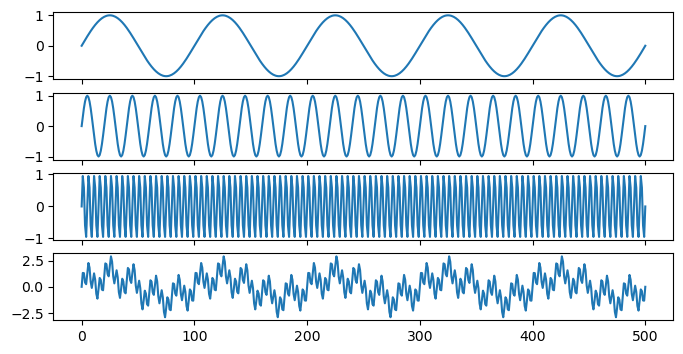

In [5]:
# We will add three waves.
# They all have the same amplitude (1) and phase (0), but different periods
a = 1.
phi = 0.

# make a list with three periods
periods = [100, 20, 5]

# make an array full of zeros that matches the size of t
# We will add each time series to ix
zsum = np.zeros_like( t )

# Plot
fig, ax = plt.subplots(4, 1, sharex = True, figsize=(8,4))
for i, T in enumerate( periods ):
    omega = 2*np.pi / T
    z = a * np.sin(omega * t + phi)
    zsum = zsum + z
    # plot as we go along in the loop
    ax[i].plot( t, z )

# plot the sum
ax[3].plot( t, zsum )
    

### In the ocean, shorter-period waves tend to have smaller amplitude. Like this:

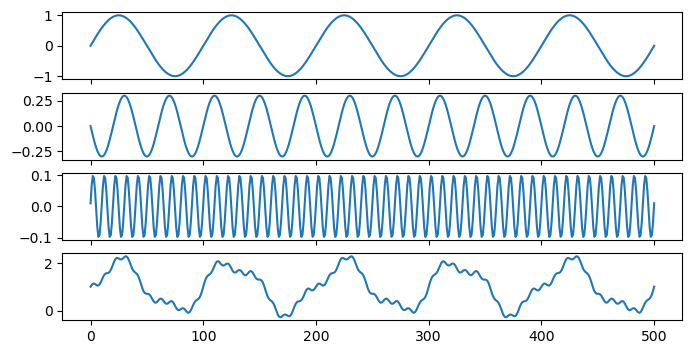

In [6]:
total_time = 500
t = np.arange( 0., total_time+1 )  # time array [s]

# List with three amplitudes
a = [ 1, .3, .1 ]
# List with three phases
phi = [0., np.pi, .1]
# list with three periods
periods = [100, 40, 10]

# make an array full of zeros that matches the size of t
# We will add each time series to ix
zsum = np.ones_like( t )

# Plot
fig, ax = plt.subplots(4, 1, sharex = True, figsize=(8,4))
for i, T in enumerate( periods ):
    omega = 2*np.pi / T
    z = a[i] * np.sin(omega * t + phi[i])
    zsum = zsum + z
    # plot as we go along in the loop
    ax[i].plot( t, z )

# plot the sum
ax[3].plot( t, zsum )

### Finally, if we pick the right amplitudes, phases, and periods, and with enough individual curves...
we can make any shape time series we want. Here is an almost square wave made by summing five sine waves.

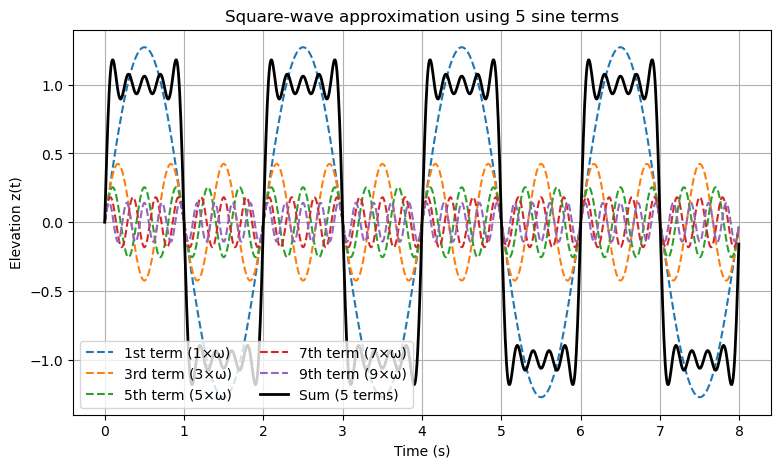

In [7]:
# Parameters
T = 2.0                      # period [s]
omega = 2 * np.pi / T        # angular frequency [rad/s]
a = 1.0                      # amplitude

# here, we use the linspace function to make the time series
t = np.linspace(0, 4*T, 1000, endpoint=False)  # four periods

# make five individual sine curves using special amplitudes and phases called odd harmonics
z1 = (4*a/np.pi) * (1/1) * np.sin(1 * omega * t)
z3 = (4*a/np.pi) * (1/3) * np.sin(3 * omega * t)
z5 = (4*a/np.pi) * (1/5) * np.sin(5 * omega * t)
z7 = (4*a/np.pi) * (1/7) * np.sin(7 * omega * t)
z9 = (4*a/np.pi) * (1/9) * np.sin(9 * omega * t)

# Sum of all five curves
zsum = z1 + z3 + z5 + z7 + z9

# plot each curve individually, and then the sum
plt.figure(figsize=(9,5))
plt.plot(t, z1, '--', label='1st term (1×ω)')
plt.plot(t, z3, '--', label='3rd term (3×ω)')
plt.plot(t, z5, '--', label='5th term (5×ω)')
plt.plot(t, z7, '--', label='7th term (7×ω)')
plt.plot(t, z9, '--', label='9th term (9×ω)')
plt.plot(t, zsum, 'k', linewidth=2.0, label='Sum (5 terms)')
plt.xlabel('Time (s)')
plt.ylabel('Elevation z(t)')
plt.title('Square-wave approximation using 5 sine terms')
plt.legend(ncol=2)
plt.grid(True)
plt.show()


### And just to prove the point, we can make pretty good square wave by summing 501 sine curves.

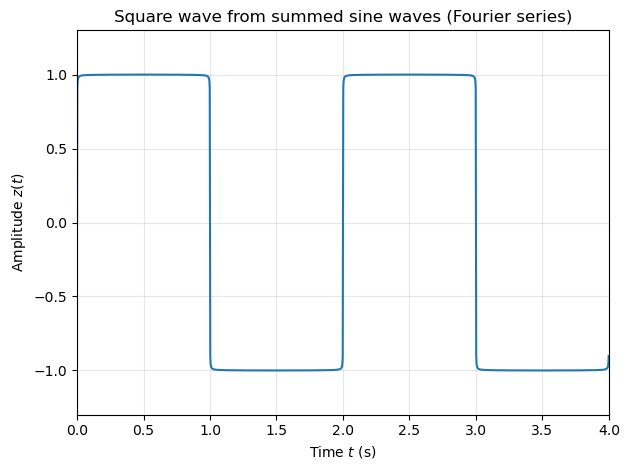

In [8]:
# Parameters
T = 2.0                      # period [s]
omega = 2 * np.pi / T        # angular frequency [rad/s]
a = 1.0                      # square-wave half-amplitude (outputs ±A)
t = np.linspace(0, 2*T, 2000, endpoint=False)  # two periods

zsum = np.zeros_like(t)      # start with zeros (same shape as t)

# Choose how many curves by changing Nodd
Nodd = 501

for n in np.arange(1, 2*Nodd, 2):  # odd integers: 1,3,5,...
    term = (4*a/np.pi) * (1/n) * np.sin(n * omega * t)
    zsum += term  # add this harmonic to the running sum

# Plot
plt.plot(t, zsum)
plt.xlim(0, 2*T)
plt.ylim(-1.3*a, 1.3*a)
plt.xlabel('Time $t$ (s)')
plt.ylabel('Amplitude $z(t)$')
plt.title('Square wave from summed sine waves (Fourier series)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### ...and here is a sawtooth curve, using a different combo of amplitudes, phases and periods
play with the number of curves by changing Nharm

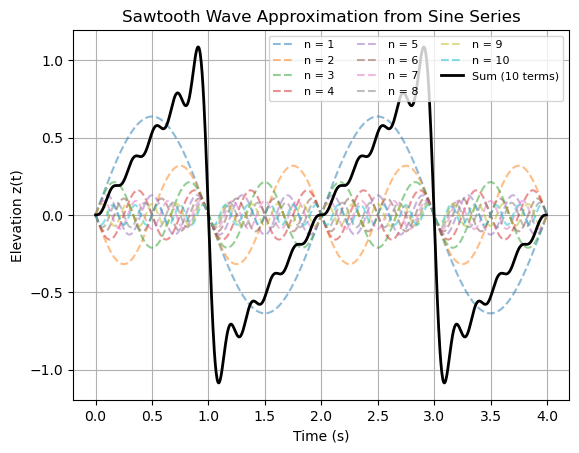

In [9]:
# Parameters
T = 2.0                      # period [s]
omega = 2 * np.pi / T        # angular frequency [rad/s]
a = 1.0                      # amplitude
t = np.linspace(0, 2*T, 1000, endpoint=False)  # two periods

zsum = np.zeros_like(t)
Nharm = 10                   # number of harmonics to include

for n in range(1, Nharm+1):
    z = (2*a/np.pi) * ((-1)**(n+1)/n) * np.sin(n * omega * t)
    zsum += z
    plt.plot(t, z, '--', alpha = 0.5, label=f'n = {n}')

# Total sum (approximation)
plt.plot(t, zsum, 'k', linewidth=2.0, label=f'Sum ({Nharm} terms)')

plt.xlabel('Time (s)')
plt.ylabel('Elevation z(t)')
plt.title('Sawtooth Wave Approximation from Sine Series')
plt.grid(True)
plt.legend(ncol=3, fontsize=8)
plt.show()
